In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
def data_preprocess(csv_file, target_column):
    df = pd.read_csv(csv_file)
    df.head()
    label_encoder = LabelEncoder()
    main_data = df.drop(columns=target_column)
    target_data = df[target_column]
    encoded_data = label_encoder.fit_transform(target_data)
    target_data = pd.DataFrame({target_column:encoded_data})
    merged_df = pd.concat([main_data, target_data], axis=1)
    scalar = StandardScaler()
    scaled_data = scalar.fit_transform(main_data)
    main_data = pd.DataFrame(columns=main_data.columns,data=scaled_data)
    
    return main_data, target_data, merged_df

In [3]:
main_data, target_data, merged_df = data_preprocess('voice.csv', 'label')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(main_data, target_data, test_size=0.2, random_state=10)

In [5]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2953,-0.062407,0.470665,0.102164,0.099750,0.090073,-0.063729,-0.226967,-0.160758,1.004844,0.852330,-2.141210,-0.062407,0.479951,-0.791457,0.114817,-1.301989,-0.708404,-1.364849,-1.352544,0.448118
423,0.457983,0.135461,0.871579,-0.135263,0.721507,0.552567,-0.341305,-0.224438,0.137874,-0.131702,0.673974,0.457983,-1.007507,0.378590,-3.065106,-0.451182,1.266647,-0.210927,-0.233771,-0.129353
1150,0.159863,0.508327,-0.423359,-0.066624,1.103309,0.685427,-0.143408,-0.187853,0.229339,0.286865,1.486164,0.159863,-0.345596,0.580230,0.513540,0.114968,-0.461523,0.996253,1.004869,-0.533571
2433,1.441577,-0.977660,1.248578,1.327695,1.097427,-0.904316,-0.364871,-0.236175,-0.809288,-0.867347,0.994633,1.441577,1.130780,0.652038,0.672624,2.638687,-0.461523,1.981526,1.990454,-0.368001
169,-1.411757,1.865703,-0.797513,-1.852446,-0.494416,1.834580,0.177415,0.055664,1.586425,2.033749,-1.492325,-1.411757,-1.102727,-0.661158,0.565959,-0.216175,-0.708404,-0.408425,-0.395816,0.185869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-1.643387,1.627336,-0.373796,-2.102831,-0.735682,1.986166,-0.363867,-0.231227,0.972728,1.124520,0.692005,-1.643387,1.163918,-0.263090,-1.006593,-0.614671,-0.708404,-0.503846,-0.491267,0.041250
1180,1.000634,0.399250,1.738976,-0.027394,1.817036,1.035152,-0.195898,-0.212386,-1.332291,-1.193993,1.332654,1.000634,-0.380028,0.567828,0.260185,2.402135,1.760410,3.752353,3.721887,-0.668248
1344,-0.073493,0.168410,0.164689,-0.516960,-0.194965,0.480485,-0.228069,-0.207809,0.173637,0.143344,0.355276,-0.073493,-0.807325,0.531351,0.672624,0.429379,-0.461523,0.030953,0.039262,-0.656543
527,-1.700426,1.665317,-1.672262,-1.397678,-0.470619,1.330281,5.220902,5.268897,-0.727172,0.354812,-2.141210,-1.700426,-1.954837,-0.962442,0.260185,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772


In [6]:
def model_fit(model, x_train, y_train, x_test, y_test, name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=knn_model_default.classes_)
    cm_plot.plot()
    plt.savefig(f'{str(name)}_confusion_matrix.png')
    plt.show()
    print(classification_report(y_test, y_pred))
    
    

In [7]:
knn_model_default = KNeighborsClassifier()

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


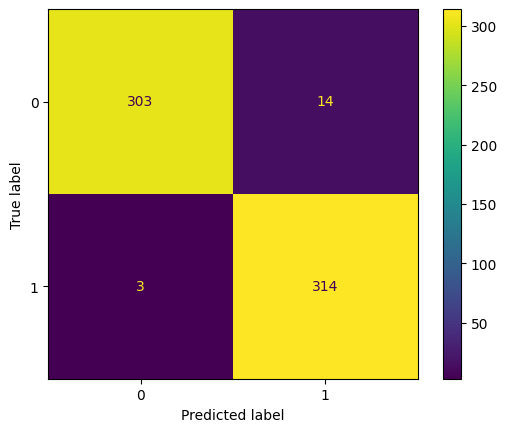

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       317
           1       0.96      0.99      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [8]:
model_fit(knn_model_default,X_train,y_train, X_test, y_test, 'default')

<Axes: >

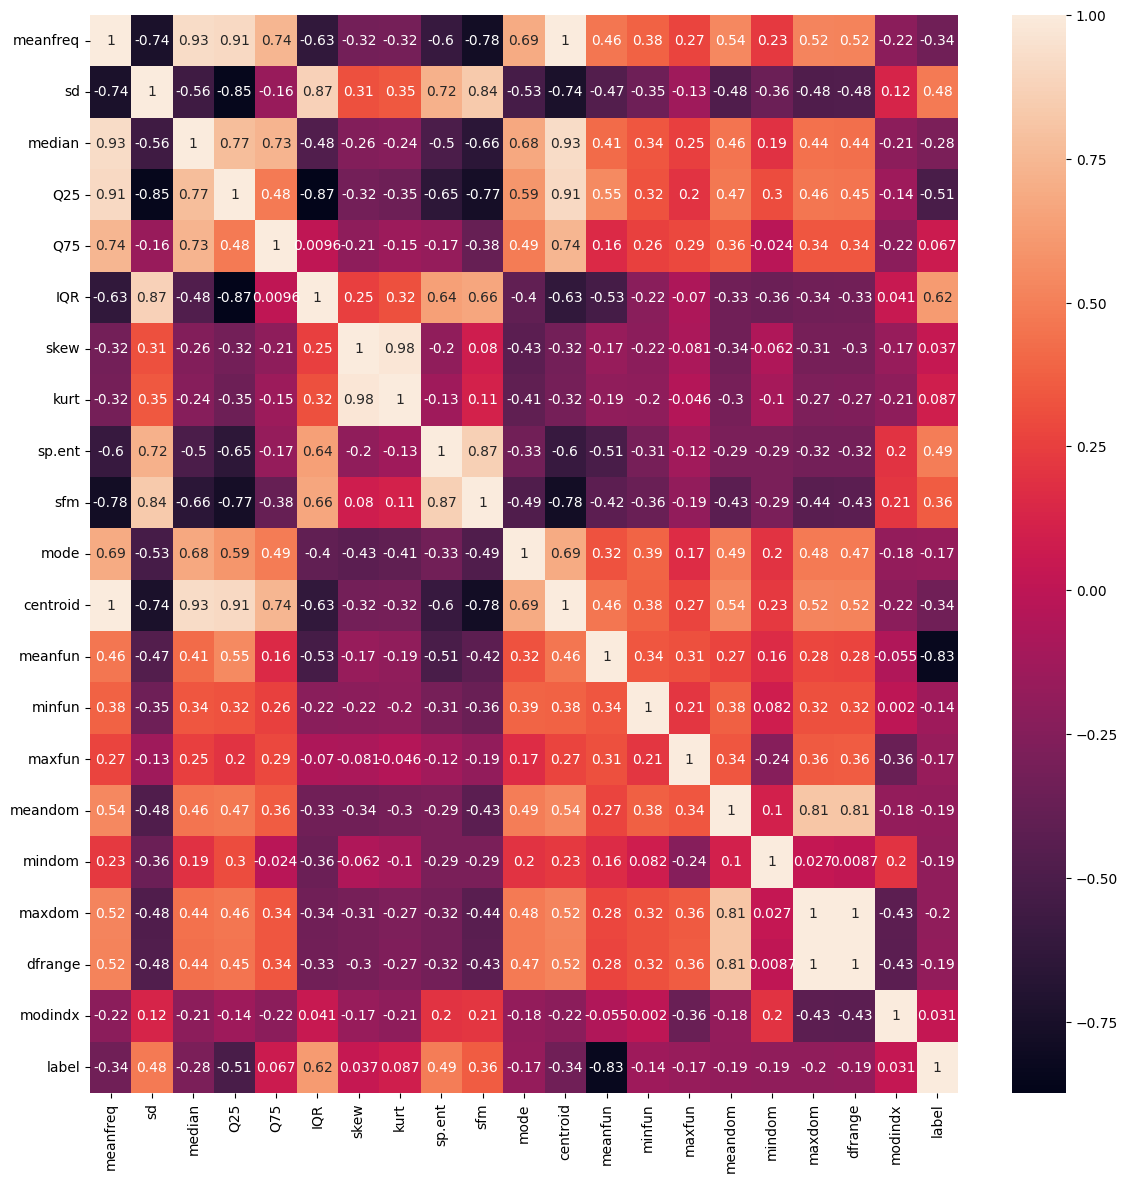

In [9]:
plt.figure(figsize=(14,14))
sns.heatmap(merged_df.corr(), annot=True)

<Axes: >

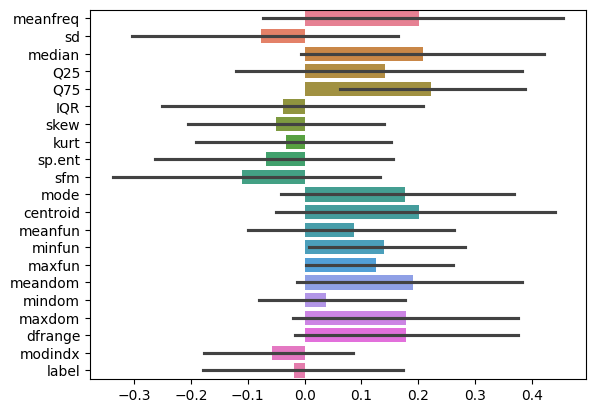

In [10]:
sns.barplot(merged_df.corr(), orient='y')

In [11]:
random_weights = np.random.random(20)
weighted_Knn = KNeighborsClassifier(metric_params={'w':random_weights})

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


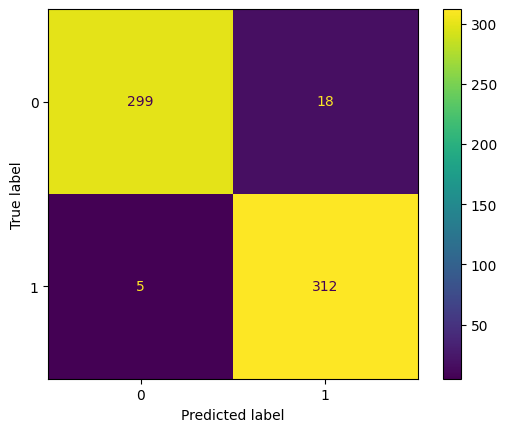

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       317
           1       0.95      0.98      0.96       317

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [12]:
model_fit(weighted_Knn, X_train,y_train, X_test, y_test, 'weighted')

In [13]:
corr_matrix = merged_df.corr()


class_corr = corr_matrix['label'].sort_values(ascending=False)


class_corr = class_corr.drop(labels=['label'])

In [14]:
class_corr

IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64

In [15]:
random_weight_within_range = list(np.random.randint(4, size=4))

In [16]:
random_weight_within_range

[np.int64(1), np.int64(2), np.int64(2), np.int64(3)]

In [17]:
weights = {'IQR': 1, 'sp.ent': 2, 'sd': 3, 'sfm':4}


In [18]:
# X_train = X_train[i for i in weights.keys()]
for i in weights.keys():
    X_train[i] = X_train[i] * weights[i]

In [19]:
# def specific_weight(columns):
#     if columns in weights.keys():
#         return columns * weighted_Knn[columns]

In [20]:
specific_weight_knn = KNeighborsClassifier()

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


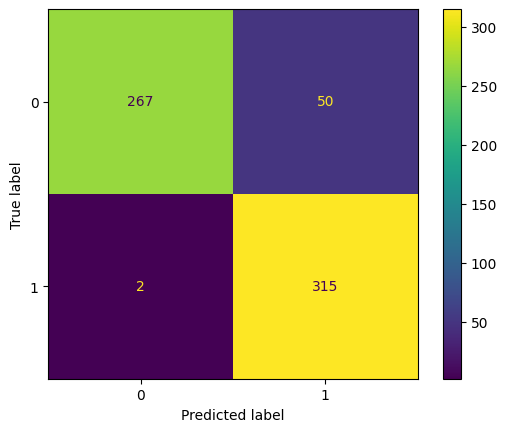

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       317
           1       0.86      0.99      0.92       317

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



In [21]:
model_fit(specific_weight_knn, X_train, y_train, X_test, y_test, 'specific_weight')

In [22]:
param_grid = {'n_neighbors': np.arange(1, 30,2)}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k}')
print(f'Best cross-validation accuracy: {best_score}')

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env

Best k: 1
Best cross-validation accuracy: 0.9743511783645562


/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env

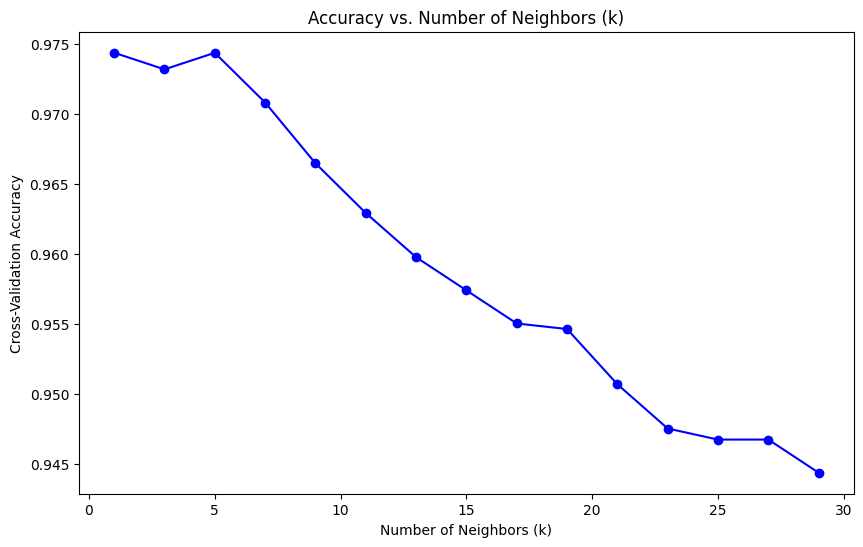

In [23]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
param_k = param_grid['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(param_k, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.savefig('kvsaccuracy.png')
plt.grid(False)
plt.show()

In [24]:
optimun_knn = KNeighborsClassifier(n_neighbors=3)

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/DataMining-Labs/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


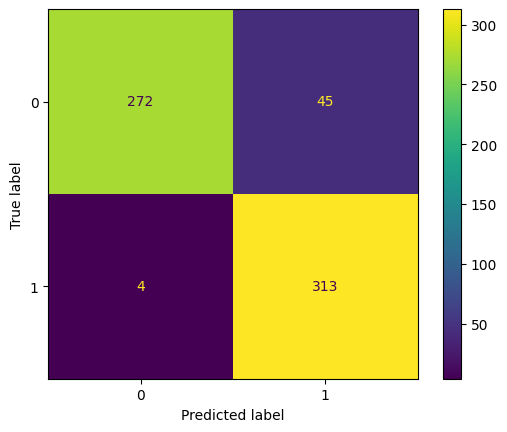

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       317
           1       0.87      0.99      0.93       317

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



In [25]:
model_fit(optimun_knn, X_train, y_train, X_test, y_test, 'optinum')